In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")

In [110]:
#The following code determines the fill rate of columns
#determining then number of rows and columns
data.shape
no_rows = data.shape[0]
no_columns = data.shape[1]

column_null_rate = []
column_names = []

for col_names in data.columns:
    null_rate = (data[col_names].isnull().sum()/data.shape[0])*100
    if (null_rate > 30): 
        column_null_rate.append(null_rate)
        column_names.append(col_names)

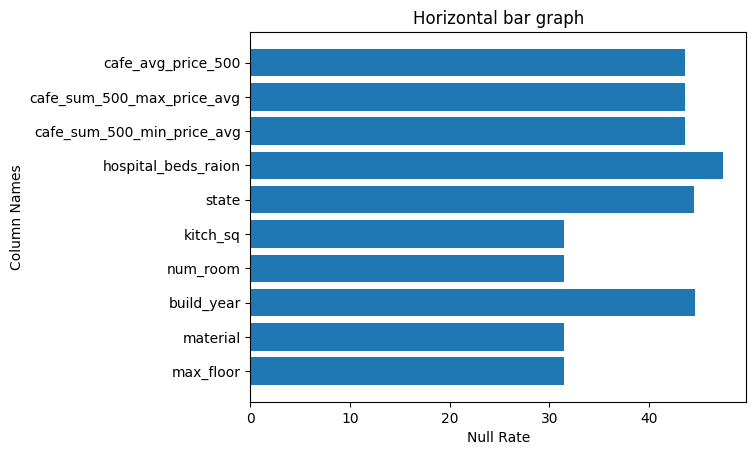

In [111]:
# getting values against each value of y
plt.barh(column_names, column_null_rate)
 
# setting label of y-axis
plt.ylabel("Column Names")
 
# setting label of x-axis
plt.xlabel("Null Rate")
plt.title("Horizontal bar graph")
plt.show()

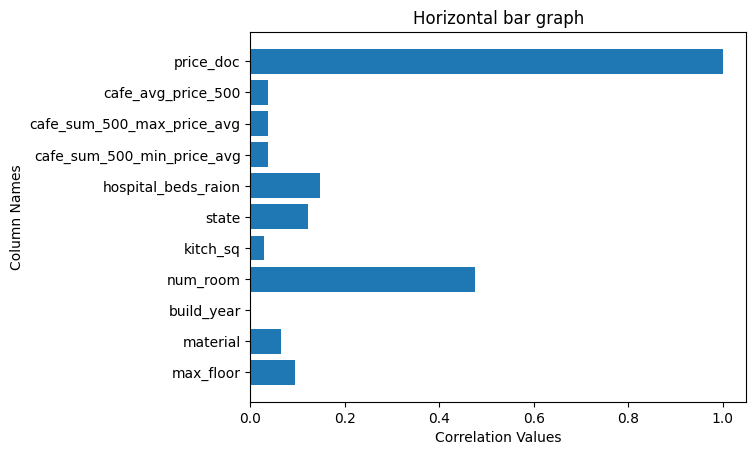

In [112]:
new_column_names = column_names
new_column_names.append('price_doc')
new_df = data[new_column_names]


# getting values against each value of y
plt.barh(new_column_names, new_df.corr()['price_doc'])
 
# setting label of y-axis
plt.ylabel("Column Names")
 
# setting label of x-axis
plt.xlabel("Correlation Values")
plt.title("Horizontal bar graph")
plt.show()

In [113]:
new_column_names.remove('num_room')
new_column_names.remove('price_doc')
data.drop(new_column_names,axis=1,inplace =True)

In [114]:
#for segregating numberical and cetegorical data
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

num_columns = numeric_data.columns
cat_columns = categorical_data.columns
print("Categorical Types",cat_columns)

Categorical Types Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


In [115]:
data.head()

,id,timestamp,full_sq,life_sq,floor,num_room,product_type,sub_area,area_m,raion_popul,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,20/08/2011,43,27.0,4.0,NaN,Investment,Bibirevo,6.407578e+06,155572,...,9,4,0,13,22,1,0,52,4,5850000
1,2,23/08/2011,34,19.0,3.0,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,...,15,3,0,15,29,1,10,66,14,6000000
2,3,27/08/2011,43,29.0,2.0,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,...,10,3,0,11,27,0,4,67,10,5700000
3,4,01/09/2011,89,50.0,9.0,NaN,Investment,Mitino,1.258354e+07,178473,...,11,2,1,4,4,0,0,26,3,13100000
4,5,05/09/2011,77,77.0,4.0,NaN,Investment,Basmannoe,8.398461e+06,108171,...,319,108,17,135,236,2,91,195,14,16331452


In [116]:
# Data already contains culture_objects_top_25 relevant details and ID_metro & ID_railroad_station_walk are redundant
data.drop(['culture_objects_top_25','ID_metro','ID_railroad_station_walk'],axis=1,inplace = True)

In [117]:
#data encoding
categorical_col_names = ['thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion',
                         'railroad_terminal_raion','big_market_raion','nuclear_reactor_raion','detention_facility_raion',
                         'water_1line','big_road1_1line','railroad_1line']

for col_name in categorical_col_names:
    data[col_name + '_NO'] = [1 if i == 'no' else 0 for i in data[col_name]]
    data[col_name + '_YES'] = [1 if i == 'yes' else 0 for i in data[col_name]]

#productype data encoding
data['product_type_investment'] = [1 if ptype == 'Investment' else 0 for ptype in data['product_type']]
data['product_type_OwnerOccupier'] = [1 if ptype == 'OwnerOccupier' else 0 for ptype in data['product_type']]

#ecology data encoding
data['ecology_poor'] = [1 if etype == 'poor' else 0 for etype in data['ecology']]
data['ecology_satisfactory'] = [1 if etype == 'satisfcatory' else 0 for etype in data['ecology']]
data['ecology_good'] = [1 if etype == 'good' else 0 for etype in data['ecology']]
data['ecology_excellent'] = [1 if etype == 'poor' else 0 for etype in data['ecology']]

categorical_col_names.append('product_type')
categorical_col_names.append('ecology')
data.drop(categorical_col_names,axis=1,inplace=True)


In [118]:
data

,id,timestamp,full_sq,life_sq,floor,num_room,sub_area,area_m,raion_popul,green_zone_part,...,big_road1_1line_NO,big_road1_1line_YES,railroad_1line_NO,railroad_1line_YES,product_type_investment,product_type_OwnerOccupier,ecology_poor,ecology_satisfactory,ecology_good,ecology_excellent
0,1,20/08/2011,43,27.0,4.0,NaN,Bibirevo,6.407578e+06,155572,0.189727,...,1,0,1,0,1,0,0,0,1,0
1,2,23/08/2011,34,19.0,3.0,NaN,Nagatinskij Zaton,9.589337e+06,115352,0.372602,...,1,0,1,0,1,0,0,0,0,0
2,3,27/08/2011,43,29.0,2.0,NaN,Tekstil'shhiki,4.808270e+06,101708,0.112560,...,1,0,1,0,1,0,1,0,0,1
3,4,01/09/2011,89,50.0,9.0,NaN,Mitino,1.258354e+07,178473,0.194703,...,1,0,1,0,1,0,0,0,1,0
4,5,05/09/2011,77,77.0,4.0,NaN,Basmannoe,8.398461e+06,108171,0.015234,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,30/06/2015,44,27.0,7.0,2.0,Otradnoe,1.005305e+07,175518,0.096270,...,1,0,1,0,1,0,0,0,1,0
30467,30470,30/06/2015,86,59.0,3.0,4.0,Tverskoe,7.307411e+06,75377,0.065444,...,1,0,1,0,1,0,1,0,0,1
30468,30471,30/06/2015,45,NaN,10.0,1.0,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,...,1,0,1,0,0,1,0,0,0,0
30469,30472,30/06/2015,64,32.0,5.0,2.0,Obruchevskoe,6.050065e+06,78616,0.167526,...,1,0,1,0,1,0,0,0,0,0


INTERPOLATION

In [119]:
#displaying columns with null values
for col_name in data.columns:
    if(data[col_name].isnull().sum() != 0):
        print(col_name," ",data[col_name].isnull().sum())

life_sq   6383
floor   167
num_room   9572
preschool_quota   6688
school_quota   6685
raion_build_count_with_material_info   4991
build_count_block   4991
build_count_wood   4991
build_count_frame   4991
build_count_brick   4991
build_count_monolith   4991
build_count_panel   4991
build_count_foam   4991
build_count_slag   4991
build_count_mix   4991
raion_build_count_with_builddate_info   4991
build_count_before_1920   4991
build_count_1921-1945   4991
build_count_1946-1970   4991
build_count_1971-1995   4991
build_count_after_1995   4991
metro_min_walk   25
metro_km_walk   25
railroad_station_walk_km   25
railroad_station_walk_min   25
cafe_sum_1000_min_price_avg   6524
cafe_sum_1000_max_price_avg   6524
cafe_avg_price_1000   6524
cafe_sum_1500_min_price_avg   4199
cafe_sum_1500_max_price_avg   4199
cafe_avg_price_1500   4199
cafe_sum_2000_min_price_avg   1725
cafe_sum_2000_max_price_avg   1725
cafe_avg_price_2000   1725
cafe_sum_3000_min_price_avg   991
cafe_sum_3000_max_price_avg  

In [120]:
#replacing fill values with mode

data["num_room"].fillna(data["num_room"].mode()[0],inplace =True)

#replacing fill values with mean
col_names_mean = ['preschool_quota','school_quota','raion_build_count_with_material_info','build_count_block',
                  'build_count_wood','build_count_frame','build_count_brick','build_count_monolith','build_count_panel',
                  'build_count_foam','build_count_slag','build_count_mix','raion_build_count_with_builddate_info',
                  'build_count_before_1920','build_count_1921-1945','build_count_1946-1970','build_count_1946-1970',
                  'build_count_1971-1995','build_count_after_1995','life_sq','build_count_brick','metro_min_walk',
                  'metro_km_walk','cafe_avg_price_5000','cafe_sum_5000_max_price_avg', 'cafe_sum_3000_min_price_avg',
                  'cafe_avg_price_2000','cafe_sum_2000_max_price_avg','cafe_sum_2000_min_price_avg','cafe_avg_price_1500',
                  'cafe_sum_1500_max_price_avg','cafe_sum_1000_min_price_avg','metro_min_walk','metro_km_walk',
                  'railroad_station_walk_km','railroad_station_walk_min','cafe_sum_1000_max_price_avg',
                 'cafe_avg_price_1000','cafe_sum_1500_min_price_avg','cafe_sum_3000_max_price_avg',
                 'cafe_avg_price_3000','prom_part_5000','cafe_sum_5000_min_price_avg']

for col_name in col_names_mean:
    data[col_name].fillna(data[col_name].mean(),inplace=True)

#dropping any remaining Null values
data.dropna()

,id,timestamp,full_sq,life_sq,floor,num_room,sub_area,area_m,raion_popul,green_zone_part,...,big_road1_1line_NO,big_road1_1line_YES,railroad_1line_NO,railroad_1line_YES,product_type_investment,product_type_OwnerOccupier,ecology_poor,ecology_satisfactory,ecology_good,ecology_excellent
0,1,20/08/2011,43,27.000000,4.0,2.0,Bibirevo,6.407578e+06,155572,0.189727,...,1,0,1,0,1,0,0,0,1,0
1,2,23/08/2011,34,19.000000,3.0,2.0,Nagatinskij Zaton,9.589337e+06,115352,0.372602,...,1,0,1,0,1,0,0,0,0,0
2,3,27/08/2011,43,29.000000,2.0,2.0,Tekstil'shhiki,4.808270e+06,101708,0.112560,...,1,0,1,0,1,0,1,0,0,1
3,4,01/09/2011,89,50.000000,9.0,2.0,Mitino,1.258354e+07,178473,0.194703,...,1,0,1,0,1,0,0,0,1,0
4,5,05/09/2011,77,77.000000,4.0,2.0,Basmannoe,8.398461e+06,108171,0.015234,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,30/06/2015,44,27.000000,7.0,2.0,Otradnoe,1.005305e+07,175518,0.096270,...,1,0,1,0,1,0,0,0,1,0
30467,30470,30/06/2015,86,59.000000,3.0,4.0,Tverskoe,7.307411e+06,75377,0.065444,...,1,0,1,0,1,0,1,0,0,1
30468,30471,30/06/2015,45,34.403271,10.0,1.0,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,...,1,0,1,0,0,1,0,0,0,0
30469,30472,30/06/2015,64,32.000000,5.0,2.0,Obruchevskoe,6.050065e+06,78616,0.167526,...,1,0,1,0,1,0,0,0,0,0


In [122]:
data.shape

(30471, 295)